## 1. Perkenalan
    Nama : Evan Aprillio B
    Batch : RMT-019
    Objective : Membuat model memprediksi customer Default,tanpa menambah data sintetis

## 2. Import Library

In [522]:
#import library normal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb


# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency



# metric classification
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score 


#import Sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#FE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PowerTransformer


# Mengatur opsi tampilan pandas
pd.set_option('display.max_rows', 10)

#save
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading
    Karena banyak data yang akan di load saya akan loadnya 1 1 dan melakukan EDA terhadapat data di bureau_balance, bureau, credit_card_balance, HomeCredit_columns, installments_payment, POS_CASH_balance, previous_aplication, sample_submission

In [2]:
#loading data bureau balance
df_bb=pd.read_csv("bureau_balance.csv")

#loading data bureau
df_b=pd.read_csv("bureau.csv")

#loading creaditcard_balance
df_ccb= pd.read_csv("credit_card_balance.csv")

#loading data homeCredit_columns
df_hc=pd.read_csv("HomeCredit_columns_description.csv", encoding="latin1")

#loading data installment_payments
df_ip=pd.read_csv("installments_payments.csv")

#loading data POS_CASH_balance
df_pcb=pd.read_csv("POS_CASH_balance.csv")

#loading previous_aplication
df_pa=pd.read_csv("previous_application.csv")

#loading  Sample_submission
df_ss=pd.read_csv("sample_submission.csv")

#loading aplication train
df_train=pd.read_csv("application_train.csv")

#loading aplication test
df_test=pd.read_csv("application_test.csv")

## 4. Explolatory Data Analysis

In [3]:
df_test.head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [4]:
df_train.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
df_ss.head(5)

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [6]:
df_pa.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [7]:
df_pcb.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [8]:
df_ip.head(5)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [9]:
df_ccb.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [10]:
df_b.head(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [11]:
df_bb.head(5)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

    Kesimpulan saya dari melihat Entity Diagram Relationship (ERD), Tabel Aplication train/test sudah berisi hal-hal yang penting dari keseluruhan database. olehkarena itu saya akan EDA tabel Application_train terlebih dahulu

### EDA application_train
    saya pertama tama akan EDA application_train karena saya akan mencoba membuat model predictive terhadap target

In [12]:
df_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

#### Application_train Column Description

|Column	|Description|
|-----------------------|------------------------|
|SK_ID_CURR  |  ID of loan in our sample|
|Target|	Target variable|
|NAME_CONTRACT_TYPE	|	Identification if loan is cash or revolving|
|CODE_GENDER|	Gender|
|FLAG_OWN_CAR|	Flag if the client owns a car|
|FLAG_OWN_REALTY|	Flag if client owns a house or flat	|
|CNT_CHILDREN|	Number of children the client has|
|AMT_INCOME_TOTAL|	Income of the client|
|AMT_CREDIT|	Credit amount of the loan	|
|AMT_ANNUITY|	Loan annuity|
|AMT_GOODS_PRICE|	For consumer loans it is the price of the goods for which the loan is given,|
|NAME_TYPE_SUITE|	Who was accompanying client when he was applying for the loan,|
|NAME_INCOME_TYPE|	"Clients income type (businessman, working, maternity leave,�)"|
|NAME_EDUCATION_TYPE|Level of highest education the client achieved,|
|NAME_FAMILY_STATUS|Family status of the client,|
|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|
|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region),normalized |
|DAYS_BIRTH|Client's age in days at the time of application,time only relative to the application|
|DAYS_EMPLOYED|How many days before the application the person started current employment,time only relative to the application|
|DAYS_REGISTRATION|How many days before the application did client change his registration,time only relative to the application|
|DAYS_ID_PUBLISH|How many days before the application did client change the identity document with which he applied for the loan,|
|OWN_CAR_AGE|Age of client's car|
|FLAG_MOBIL	|Did client provide mobile phone (1=YES, 0=NO)|
|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|
|FLAG_WORK_PHONE|	Did client provide home phone (1=YES, 0=NO)|
|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|
|FLAG_PHONE|Did client provide email (1=YES, 0=NO)"|
|FLAG_EMAIL|	Type of offer that a customer prefers|
|OCCUPATION_TYPE|what kind of occupation does the client have|
|CNT_FAM_MEMBERS|How many family members does client have|
|REGION_RATING_CLIENT|"Our rating of the region where client lives (1,2,3)"|
|REGION_RATING_CLIENT_W_CITY|	"Our rating of the region where client lives with taking city into account (1,2,3)|
|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|
|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan,rounded|
|REG_REGION_NOT_LIVE_REGION|"Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|
|REG_REGION_NOT_WORK_REGION|	Points awarded to a customer on each transaction|
|REGION_POPULATION_RELATIVE|"Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|
|LIVE_REGION_NOT_WORK_REGION|"Flag if client's contact address does not match work address (1=different, 0=same, at region level)|
|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)"|
|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|
|ORGANIZATION_TYPE|Type of organization where client works,|
|EXT_SOURCE_1|	Normalized score from external data source,normalized|
| EXT_SOURCE_2|  Normalized score from external data source,normalized|
|EXT_SOURCE_3|Normalized score from external data source,normalized|
|APARTMENTS_AVG	|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|BASEMENTAREA_AVG|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|ELEVATORS_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|ENTRANCES_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FLOORSMAX_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FLOORSMIN_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LANDAREA_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LIVINGAPARTMENTS_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LIVINGAREA_AVG|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|NONLIVINGAPARTMENTS_AVG|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|NONLIVINGAREA_AVG|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|APARTMENTS_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|BASEMENTAREA_MODE|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|YEARS_BEGINEXPLUATATION_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|YEARS_BUILD_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|ELEVATORS_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|ENTRANCES_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FLOORSMAX_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FLOORSIN_MODE|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LANDAREA_MODE|	"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LIVINGAPARTMENTS_MODE	|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LIVINGAREA_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|NONLIVINGAPARTMENTS_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|NONLIVINGAREA_MODE|"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|APARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|BASEMENTAREA_MEDI|	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|YEARS_BEGINEXPLUATATION_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|YEARS_BUILD_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|COMMONAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LANDAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LIVINGAPARTMENTS_MEDI|	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|LIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|NONLIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|NONLIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|TOTALAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|OBS_30_CNT_SOCIAL_CIRCLE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|DEF_30_CNT_SOCIAL_CIRCLE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), |
|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default,|
|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD,|
|FLAG_DOCUMENT_2|Did client provide document 2|
|FLAG_DOCUMENT_3|Did client provide document 3|
|FLAG_DOCUMENT_4|Did client provide document 4|
|FLAG_DOCUMENT_5|Did client provide document 5|
|FLAG_DOCUMENT_6|Did client provide document 6|
|FLAG_DOCUMENT_7|Did client provide document 7|
|FLAG_DOCUMENT_8|Did client provide document 8|
|FLAG_DOCUMENT_9|Did client provide document 9|
|FLAG_DOCUMENT_10|Did client provide document 10|
|FLAG_DOCUMENT_11|Did client provide document 11|
|FLAG_DOCUMENT_12|Did client provide document 12|
|FLAG_DOCUMENT_13|Did client provide document 13|
|FLAG_DOCUMENT_14|Did client provide document 14|
|FLAG_DOCUMENT_15|Did client provide document 15|
|FLAG_DOCUMENT_16|Did client provide document 16|
|FLAG_DOCUMENT_17|Did client provide document 17|
|FLAG_DOCUMENT_18|Did client provide document 18|
|FLAG_DOCUMENT_19|Did client provide document 19|
|FLAG_DOCUMENT_20|Did client provide document 20|
|FLAG_DOCUMENT_21|Did client provide document 21|
|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application,|
|AMT_REQ_CREDIT_BUREAU_DAY|	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application),|
|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application),|
|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application),|
|AMT_REQ_CREDIT_BUREAU_QRT|,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application),|
|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application),|

#### Memisahkan Column yang menurut saya penting untuk EDA dan yang tidak karena sudah di normalisasi
    Jadi berdasarkan Columns Description yang diberikan, dalam data ini sudah ada kolom-kolom yang sudah di normalized. sehingga saya tidak akan memasukan kedalam EDA

In [337]:
#mengambil kolom-kolom yang dibutuhkan
df_train_1=df_train.iloc[:, 0:44]
df_train_1.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0  ...                           0                          0   
1  ...                           0                          0   
2  ...                           0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
0                       0  Business Entity Type 3      0.083037      0.262949   
1                       0                  School      0.311267      0.622246   
2                       0              Government           NaN      0.555912   

   EXT_SOURCE_3  
0      0.139376  
1           NaN  
2      0.729567  

[3 rows x 44 columns]

In [338]:
df_train_2=df_train.iloc[:, 91:122]
df_train_2.head(3)

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   

   FLAG_DOCUMENT_6  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0                0  ...                 0                 0                 0   
1                0  ...                 0                 0                 0   
2                0  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 31 columns]

In [339]:
#concat antara 2 df_train_eda dengan df_train_doc
df_train_eda = pd.concat([df_train_1, df_train_2], axis=1)
df_train_eda

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [179]:
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [180]:
#cek duplikasi data
df_train_eda.duplicated().sum()


0

In [181]:
#cari missing  value
df_train_eda.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 72, dtype: int64

terlihat ada banyak data null saya akan cek berapa perbedaanya jumlahnya jika missing value di drop

In [182]:
#drop missing value
df_train_eda_drop=df_train_eda.copy()
df_train_eda_drop.dropna(axis=0, inplace=True)
df_train_eda_drop

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
2           100004       0    Revolving loans           M            Y   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
13          100017       0         Cash loans           M            Y   
15          100019       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307492      456236       0         Cash loans           M            Y   
307494      456238       0         Cash loans           M            Y   
307495      456239       0         Cash loans           M            Y   
307497      456241       0         Cash loans           F            Y   
307498      456242       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
2                    Y             0           67500.0    135000.0   
6                    Y             1          171000.0   1560726.0   
7                    Y             0          360000.0   1530000.0   
13                   N             1          225000.0    918468.0   
15                   Y             0          157500.0    299772.0   
...                ...           ...               ...         ...   
307492               Y             0          585000.0   1575000.0   
307494               N             1          270000.0    479700.0   
307495               N             0          180000.0    808650.0   
307497               Y             0          180000.0    270126.0   
307498               Y             0          198000.0   1312110.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
2            6750.0  ...                 0                0                0   
6           41301.0  ...                 0                0                0   
7           42075.0  ...                 0                0                0   
13          28966.5  ...                 0                0                0   
15          20160.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307492      43443.0  ...                 0                0                0   
307494      46858.5  ...                 0                0                0   
307495      23773.5  ...                 0                0                0   
307497      12028.5  ...                 0                0                0   
307498      52168.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
2                     0                        0.0                       0.0   
6                     0                        0.0                       0.0   
7                     0                        0.0                       0.0   
13                    0                        0.0                       0.0   
15                    0                        0.0                       0.0   
...                 ...                        ...                       ...   
307492                0                        0.0                       0.0   
307494                0                        0.0                       0.0   
307495                0                        0.0                       0.0   
307497                0                        0.0                       0.0   
307498                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
2                              0.0                        0.0   
6                              0.0                        1.0   
7                              0.0                        0.0   
13                             0.0                        0.0   
15                             

In [183]:
print(df_train_eda["SK_ID_CURR"].count())
print(df_train_eda_drop["SK_ID_CURR"].count())

307511
70457


__Jika meng drop record yang memiliki data null, maka data akan sangat berkurang. sehingga yang tersisanya hanyalah 23% dari total record.__

#### Mengubah Datatype beberapa kolom

In [184]:
#list col yang akan di convert
cols_convert=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
"FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",
"FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

#convert
df_train_eda[cols_convert] = df_train_eda[cols_convert].astype(str)
#cek
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

##### Visualisasi Data

In [340]:
#membuat list num dan cat
num_columns=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

cat_columns=["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_TYPE_SUITE","NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",
"OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
"FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",
"FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"
]


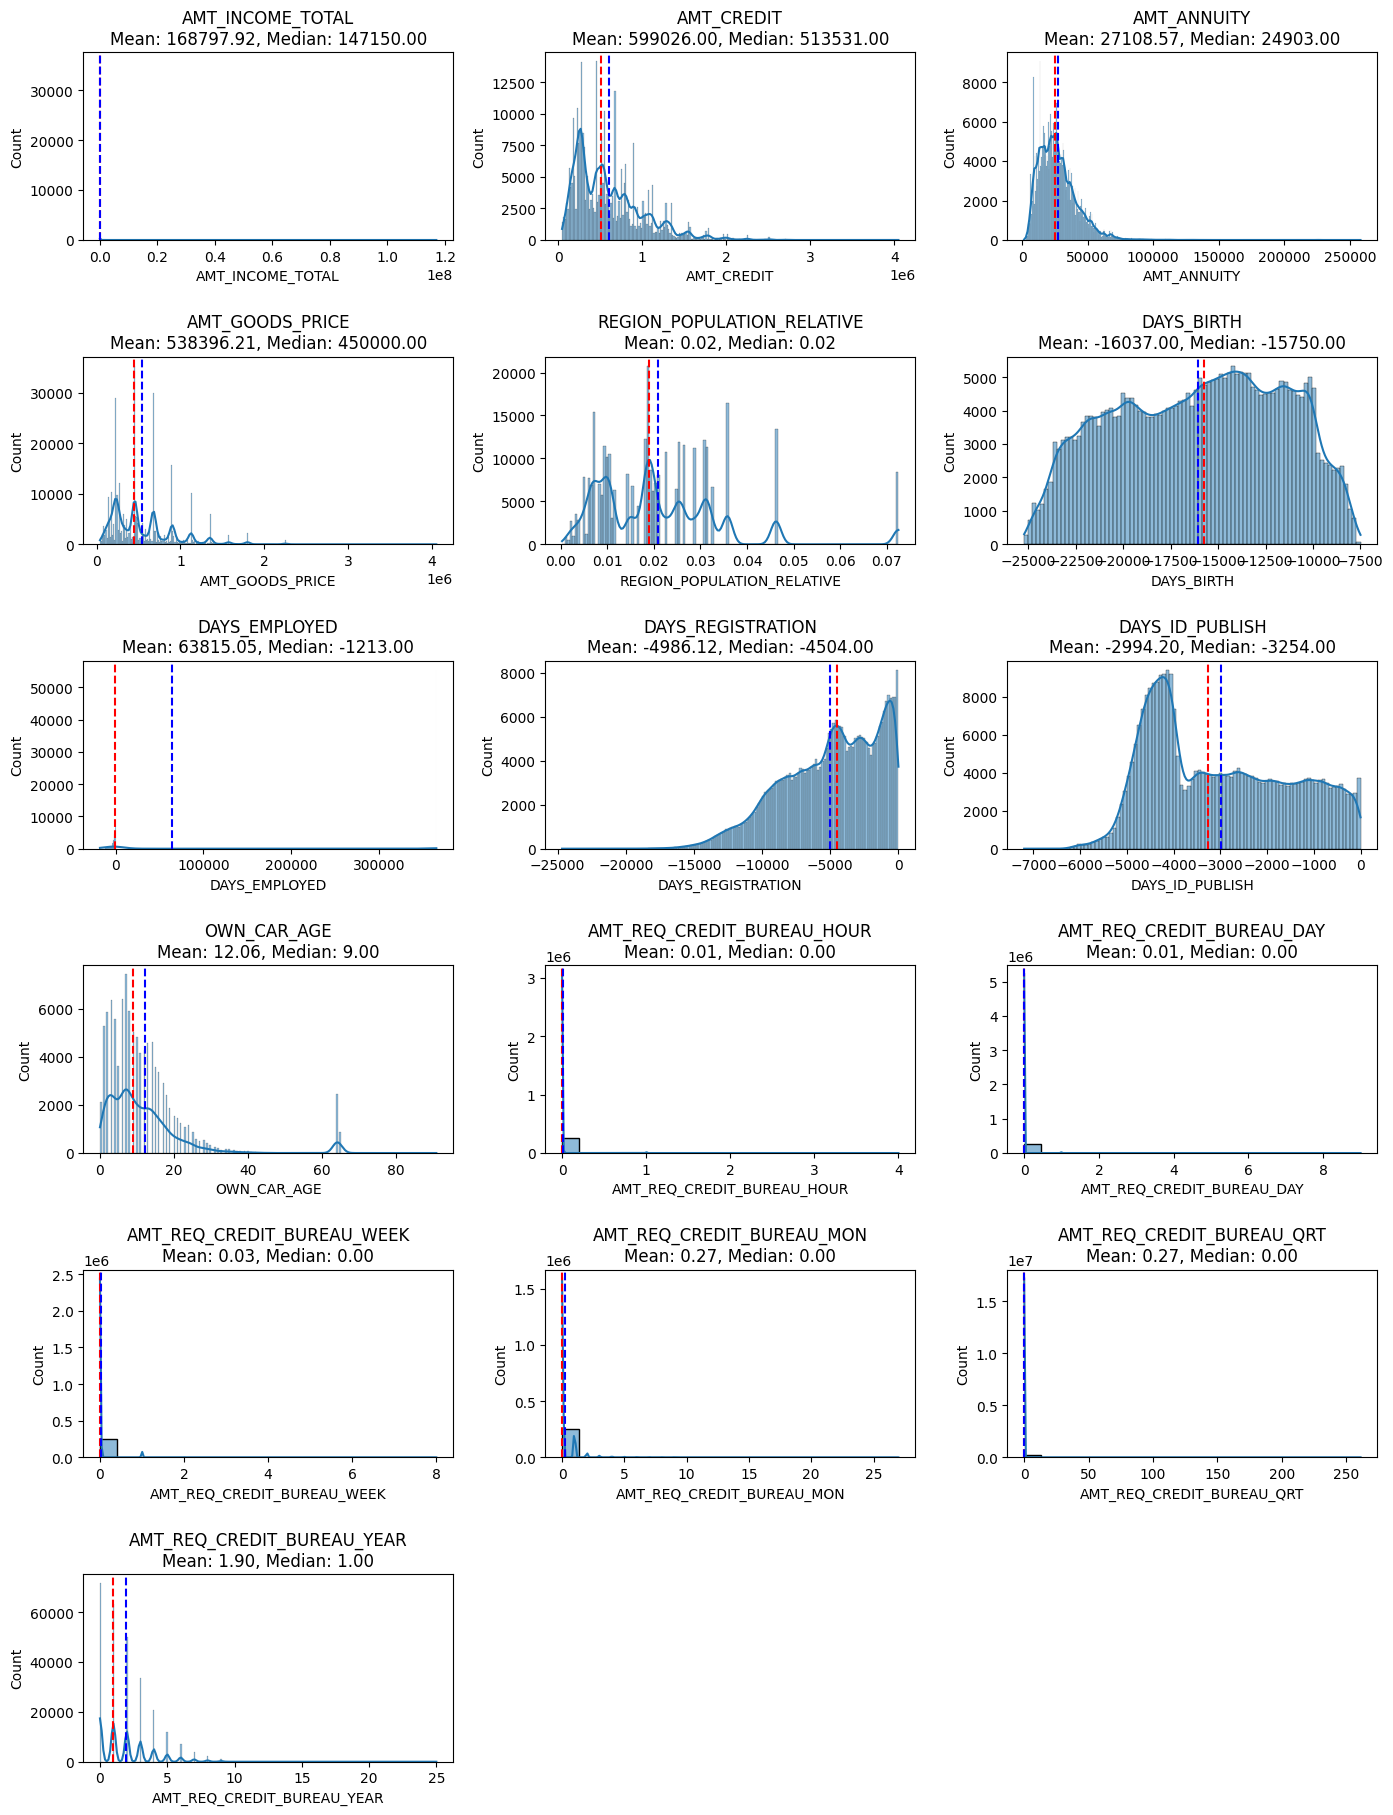

In [24]:
# Create figure and axes
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(14, 30))

# Plot histograms with KDE
for i, column in enumerate(num_columns):
    sns.histplot(data=df_train_eda, x=column, kde=True, ax=axes[i//3, i%3])
    mean_value = df_train_eda[column].mean()
    median_value = df_train_eda[column].median()
    axes[i//3, i%3].set_title(f"{column}\nMean: {mean_value:.2f}, Median: {median_value:.2f}")
    axes[i//3, i%3].axvline(median_value, color='r', linestyle='--')
    axes[i//3, i%3].axvline(mean_value, color='b', linestyle='--')

# Remove unused subplots
for k in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[k])



# Display the plot
plt.tight_layout()
plt.show()

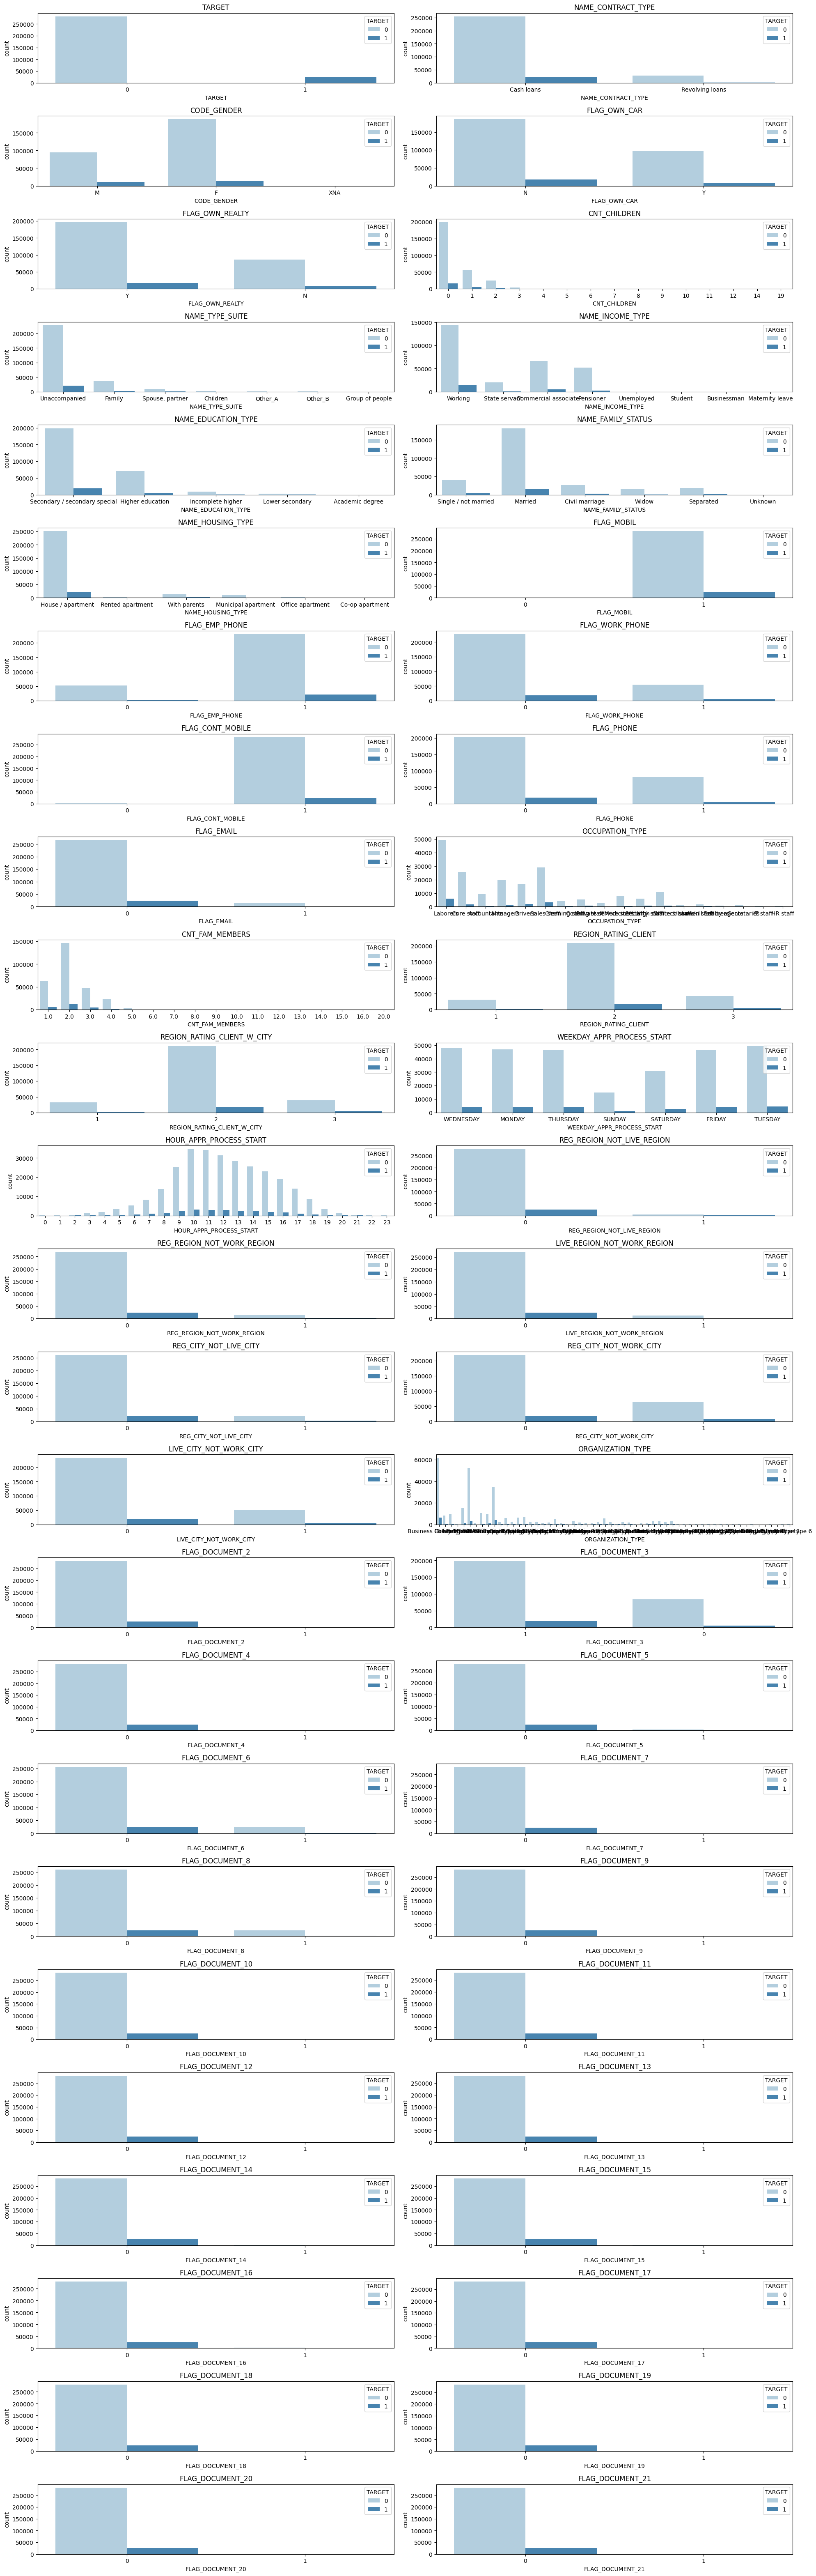

In [72]:
cat_cols=["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_TYPE_SUITE","NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",
"OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
"FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",
"FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"
]

f, axes = plt.subplots(40, 2, figsize=(20, 100), facecolor='white')

# Membuat looping
for i, column in enumerate(cat_cols):
    row = i // 2  # Nomor baris subplot
    col = i % 2   # Nomor kolom subplot
    
    # Menampilkan countplot
    ax = sns.countplot(x=column, hue='TARGET', data=df_train_eda[cat_cols], palette='Blues', ax=axes[row, col])
    ax.set_title(column)
    ax.legend(title='TARGET', loc='upper right')

# Menghapus subplot yang tidak digunakan
for ax in axes.flatten()[len(cat_cols):]:
    ax.remove()

# Menampilkan plot
plt.tight_layout()
plt.show()


Kesimpulan dari melihat Barplot: 
1. Target memiliki proporsi yang sangat tidak seimbang, Ini harus diatasi sebelum melakukan pemodelan entah dengan undersampling atau oversampling.
2. Karena sedikit nasabah yang menyerahkan document. mungkin ini lebih bagus tidak dipakai pada saat modelling 
3. ada banyak kolom-kolom yang memiliki cardinality yang besar sehingga jika ingin dijadikan feature pada saat modelling menurut saya handling cardinality diperlukan
4. saya tidak akan menggunakan kolom yang memiliki perbedaan distribusi yang sangat besar(flag_count_mobile) sebagai feature untuk model

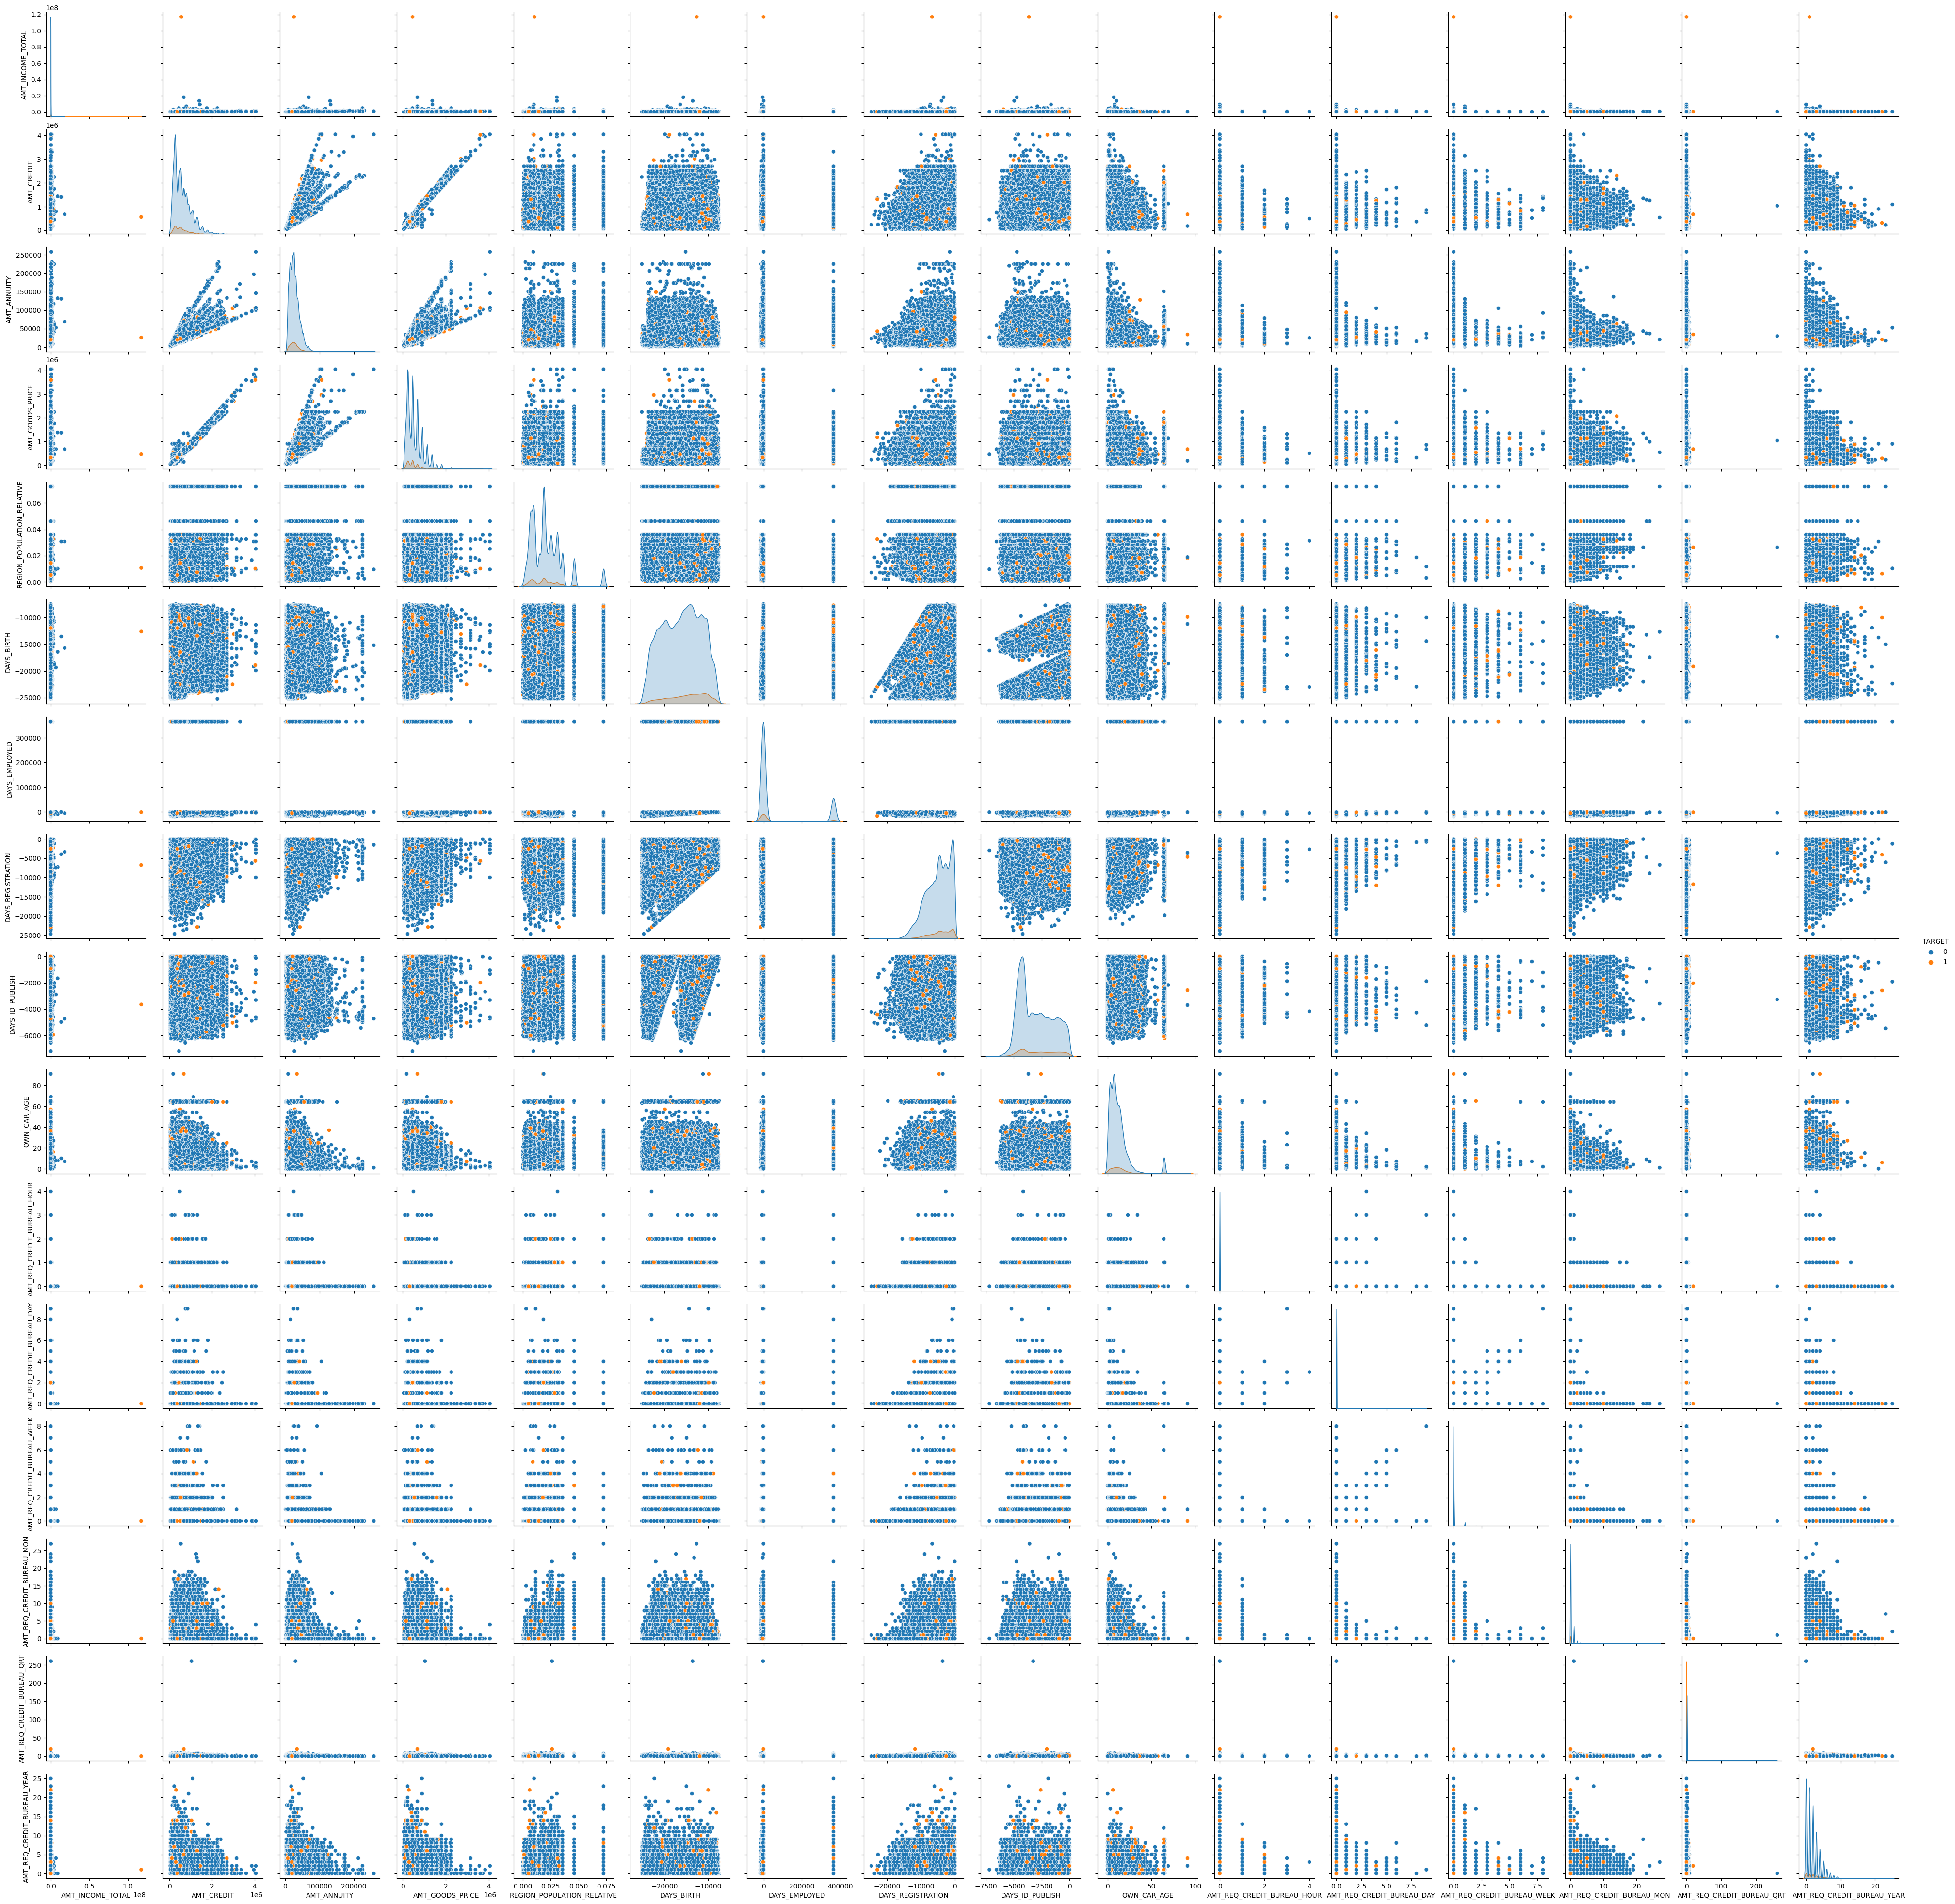

In [92]:
#ini saya commentkan karena pengerjaan pembuatan pairplotnya sangat lama
#membuat list num dan cat
# num_columns_2=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
# "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
# "AMT_REQ_CREDIT_BUREAU_YEAR","TARGET"]

# Create the pairplot
#sns.pairplot(df_train_eda[num_columns_2], hue='TARGET')

Insight : 
1. Target 1 (default) memiliki amount credit,amount goods price, dan amount_income_total yang rendah 
2. AMT_REQ_CREDIT_BUREAU jika dilihat mungkin merupakan datatype categorical

## 5. Feature Enggineering
    Dalam Bab ini saya drop missing value , mengatasi data yang tidak seimbang, outlier, dan hal-hal yang akan membuat Model beperforma Buruk

#### Undersampling
Untuk mengatasi ketidak seimbangan data, saya akan memakan teknik undersampling karena salah satu objective saya dari project ini adalah membuat model yang memiliki peforma yang bagus tanpa adanya imputasi data sintetis

In [482]:
df_train_eda["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [483]:
# Undersampling
df_train_eda_majority = df_train_eda[df_train_eda['TARGET'] == 0]
df_train_eda_minority = df_train_eda[df_train_eda['TARGET'] == 1]

In [484]:
df_majority_undersampled = resample(df_train_eda_majority,
                                    replace=False,  
                                    n_samples=45000,
                                    random_state=44)  

In [485]:
df_train_undersampled = pd.concat([df_majority_undersampled, df_train_eda_minority])
df_train_undersampled["TARGET"].value_counts()

0    45000
1    24825
Name: TARGET, dtype: int64

#### Splitting Data
    Karena AMT_REQUIRE_BUREAU memiliki banyak nilai null, saya tidak akan menggunakanya untuk pemodelan. dan saat ini saya lebih memilih jika fitur banyak memiliki null values saya lebih memilih untuk mendropnya untuk menghindari imputasi data

In [487]:
list_drop=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR","OWN_CAR_AGE","TARGET","SK_ID_CURR","ORGANIZATION_TYPE"]

In [488]:
# Memisahkan variabel independen (X) dan dependen (y)
X = df_train_undersampled.drop(list_drop, axis=1)
y = df_train_undersampled['TARGET']

In [489]:
#Memisahkan data menjadi train, va, test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=60,stratify=y)

#### Handling Missing Value

In [490]:
print("X_train null= ",X_train.isnull().sum())
print("_____________________________________________")
print("X_test null= ",X_test.isnull().sum())

X_train null=  NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64
_____________________________________________
X_test null=  NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64


In [491]:
#saya akan menggabungkan data Train karena akan saya drop dan dilihat korelasinya
train_concat = pd.concat([X_train, y_train], axis=1)
train_concat.shape

#drop data
train_concat_drop=train_concat.dropna()
train_concat_drop.shape

#lihat perbedaan besar data
print(X_train.shape)
print(train_concat_drop.shape)

#reset index
train_concat_drop.reset_index(drop=True, inplace=True)

# Memisahkan variabel independen (X) dan dependen (y)
X_train=train_concat_drop.drop(['TARGET'], axis=1)
y_train =train_concat_drop['TARGET']

(59351, 65)
(15507, 66)


In [492]:
test_concat = pd.concat([X_test, y_test], axis=1)
test_concat.shape

#drop data
test_concat_drop=test_concat.dropna()
test_concat_drop.shape

#lihat perbedaan besar data
print(X_test.shape)
print(test_concat_drop.shape)

#reset index
test_concat_drop.reset_index(drop=True, inplace=True)

# Memisahkan variabel independen (X) dan dependen (y)
X_test=test_concat_drop.drop(['TARGET'], axis=1)
y_test =test_concat_drop['TARGET']

(10474, 65)
(2774, 66)


ada pengurangan record sebesar 70% antara X_train dengan X_train drop

#### Handling Duplicates
Duplicate tidak ditemukan saat EDA

#### Handling Outlier
    Saya tidak akan menghandling outlier untuk saat ini karena saya ingin mencoba dulu tree based algorithm 

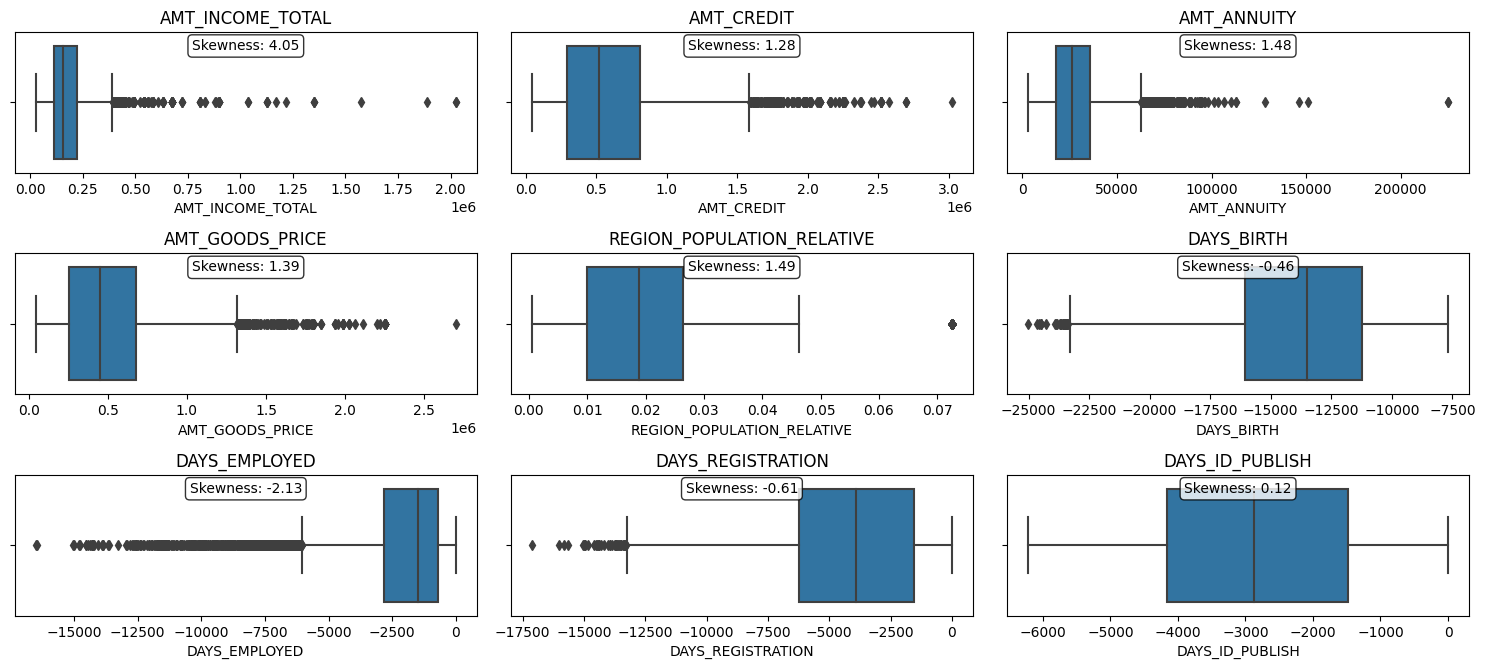

In [362]:
#membuat list num dan cat
num_columns=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 13))

# Plot boxplot
for i, column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=X_train[column], ax=ax)
    skewness = X_train[column].skew()
    ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top',
            bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    ax.set_title(column)

# Menghapus subplot yang tidak digunakan
for ax in axes.flatten()[len(num_columns):]:
    ax.remove()

# Menampilkan plot
plt.tight_layout()
plt.show()

untuk saat ini saya tidak akan handling outliernya karena saya akan mencoba menggunakan tree based algorithm terliebih dahulu

## 6. Modelling

In [493]:
num_columns_fs=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","CNT_CHILDREN","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]
cat_columns_fs=["NAME_CONTRACT_TYPE","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE",
"NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",
"REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION",
"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY",
"REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","OCCUPATION_TYPE"
]

In [494]:
X_train_num=X_train[num_columns_fs]
X_train_cat=X_train[cat_columns_fs]
#test
X_test_num=X_test[num_columns_fs]
X_test_cat=X_test[cat_columns_fs]
print(X_train_num.shape)
print(X_train_cat.shape)
print(X_test_num.shape)
print(X_test_cat.shape)

(15507, 13)
(15507, 19)
(2774, 13)
(2774, 19)


In [558]:
#melihat isi dari keseluruhan feature
i=0
for i in range(19):
    print(i)
    print(np.sort(X_train_cat.iloc[:, i].unique()))
    print(np.sort(X_test_cat.iloc[:, i].unique()))
    print("-----------------------------------------")

0
['Cash loans' 'Revolving loans']
['Cash loans' 'Revolving loans']
-----------------------------------------
1
['N' 'Y']
['N' 'Y']
-----------------------------------------
2
['N' 'Y']
['N' 'Y']
-----------------------------------------
3
['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']
['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']
-----------------------------------------
4
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
-----------------------------------------
5
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
-----------------------------------------
6
[0 1]
[0 1]
-----------------------------------------
7
[0 1]


In [497]:
# Membuat Variabel Scaler
numeric_transformer = StandardScaler()
categoric_transformer = OneHotEncoder()

#scaling
numeric_transformer.fit(X_train_num)
X_train_num_scaled=numeric_transformer.transform(X_train_num)
numeric_transformer.fit(X_test_num)
X_test_num_scaled=numeric_transformer.transform(X_test_num)

#Encode
categoric_transformer.fit(X_train_cat)
X_train_cat_encoded= categoric_transformer.transform(X_train_cat).toarray()
categoric_transformer.fit(X_test_cat)
X_test_cat_encoded= categoric_transformer.transform(X_test_cat).toarray()



In [498]:
# concate colum 
X_train_fs= np.concatenate([X_train_num_scaled,X_train_cat_encoded], axis=1)
X_test_fs= np.concatenate([X_test_num_scaled,X_test_cat_encoded], axis=1)

In [499]:
print(X_train_cat_encoded.shape)
print(X_test_cat_encoded.shape)

(15507, 68)
(2774, 68)


### Model XGB

classification Train Set xgb: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     10201
           1       0.90      0.76      0.82      5306

    accuracy                           0.89     15507
   macro avg       0.89      0.86      0.87     15507
weighted avg       0.89      0.89      0.89     15507

classification test Set xgb: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80      1851
           1       0.60      0.44      0.51       923

    accuracy                           0.71      2774
   macro avg       0.68      0.65      0.65      2774
weighted avg       0.70      0.71      0.70      2774



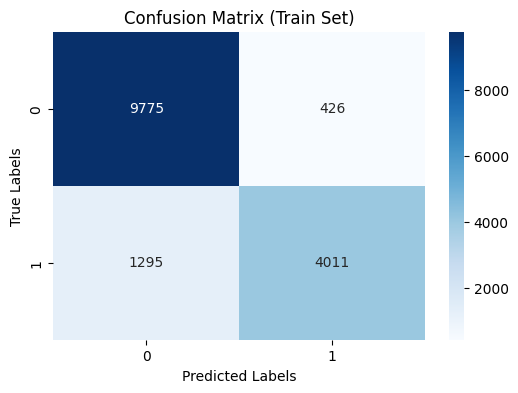

Text(45.722222222222214, 0.5, 'True Labels')

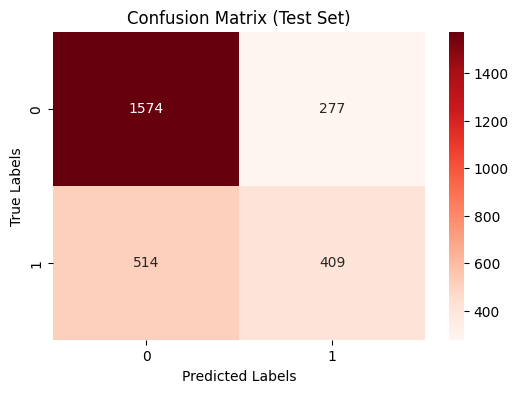

In [524]:
#import model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_fs, y_train)

#model random forest
y_pred_train_xgb = model_xgb.predict(X_train_fs)
y_pred_test_xgb = model_xgb.predict(X_test_fs)

#melihat score model random forest
print('classification Train Set xgb: \n', classification_report(y_train, y_pred_train_xgb))
#melihat score model random forest
print('classification test Set xgb: \n', classification_report(y_test, y_pred_test_xgb))

# Confusion matrix untuk train set svc
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set svc
cm_train = confusion_matrix(y_test, y_pred_test_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

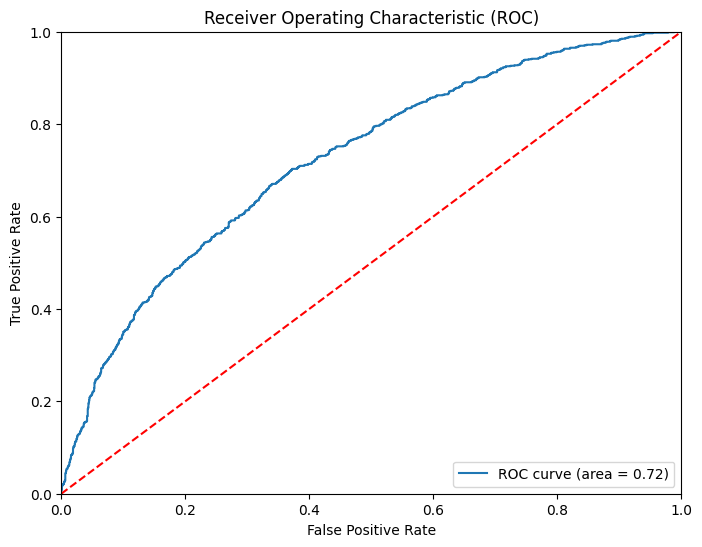

ROC AUC: 0.7229754289356636


In [525]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_xgb.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

jika dilihat dari ROC curve dan score model termasuk baik tapi belum maksimal, mungkin dengan beberapa hyperparameter yang diganti model bisa diperbaiki

In [545]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

In [537]:
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train_fs, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]})

In [547]:
print(grid_search.best_params_)
tuned_model_xgb = grid_search.best_estimator_
print(tuned_model_xgb)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


classification Train Set xgb: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82     10201
           1       0.68      0.46      0.55      5306

    accuracy                           0.74     15507
   macro avg       0.72      0.67      0.68     15507
weighted avg       0.73      0.74      0.73     15507

classification test Set xgb: 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81      1851
           1       0.63      0.43      0.51       923

    accuracy                           0.73      2774
   macro avg       0.69      0.65      0.66      2774
weighted avg       0.71      0.73      0.71      2774



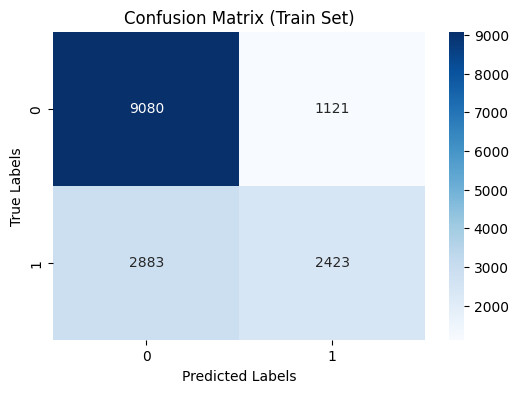

Text(45.722222222222214, 0.5, 'True Labels')

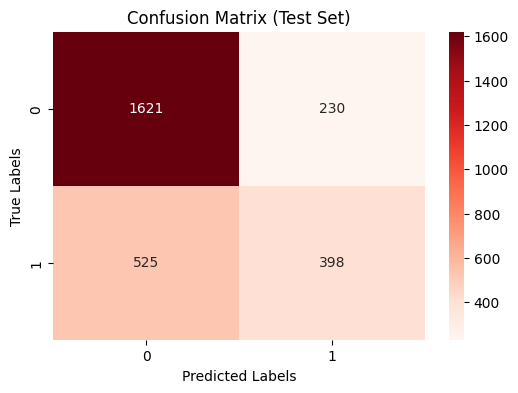

In [543]:
#import model
model_xgb_tuned = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
model_xgb_tuned.fit(X_train_fs, y_train)

#model
y_pred_train_xgb_tuned = model_xgb_tuned.predict(X_train_fs)
y_pred_test_xgb_tuned = model_xgb_tuned.predict(X_test_fs)

#melihat score model 
print('classification Train Set xgb: \n', classification_report(y_train, y_pred_train_xgb_tuned))
#melihat score model 
print('classification test Set xgb: \n', classification_report(y_test, y_pred_test_xgb_tuned))

# Confusion matrix untuk train 
cm_train = confusion_matrix(y_train, y_pred_train_xgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test 
cm_train = confusion_matrix(y_test, y_pred_test_xgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

setelah di tuning, model XGB tidak lagi bersifat underfitting

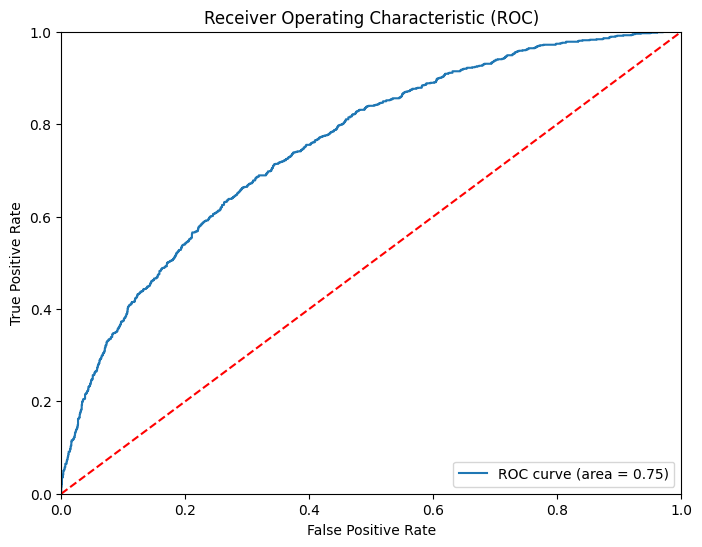

ROC AUC: 0.753769594251709


In [544]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_xgb_tuned.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

### Model Gradient Boosting

classification Train Set gbc: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82     10201
           1       0.69      0.46      0.55      5306

    accuracy                           0.74     15507
   macro avg       0.72      0.68      0.69     15507
weighted avg       0.74      0.74      0.73     15507

classification test Set gbc: 
               precision    recall  f1-score   support

           0       0.75      0.87      0.81      1851
           1       0.63      0.43      0.51       923

    accuracy                           0.72      2774
   macro avg       0.69      0.65      0.66      2774
weighted avg       0.71      0.72      0.71      2774



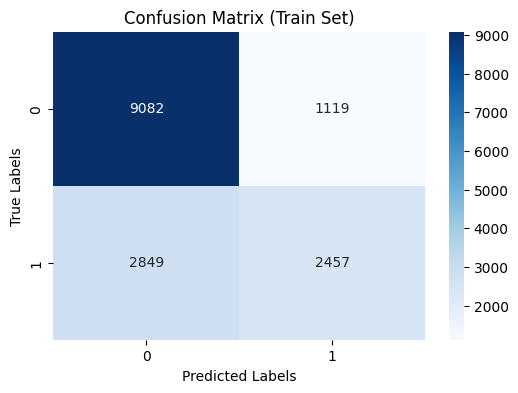

Text(45.722222222222214, 0.5, 'True Labels')

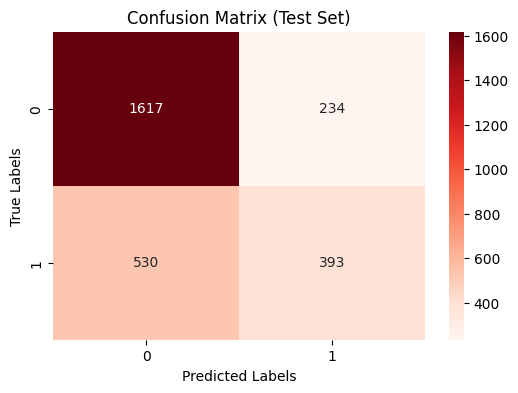

In [526]:
#import Model
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train_fs, y_train)

#model random forest
y_pred_train_gbc = model_gbc.predict(X_train_fs)
y_pred_test_gbc = model_gbc.predict(X_test_fs)

#melihat score model random forest
print('classification Train Set gbc: \n', classification_report(y_train, y_pred_train_gbc))
#melihat score model random forest
print('classification test Set gbc: \n', classification_report(y_test, y_pred_test_gbc))

# Confusion matrix untuk train set svc
cm_train = confusion_matrix(y_train, y_pred_train_gbc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set svc
cm_train = confusion_matrix(y_test, y_pred_test_gbc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

1. Model masih bersifat Underfitting

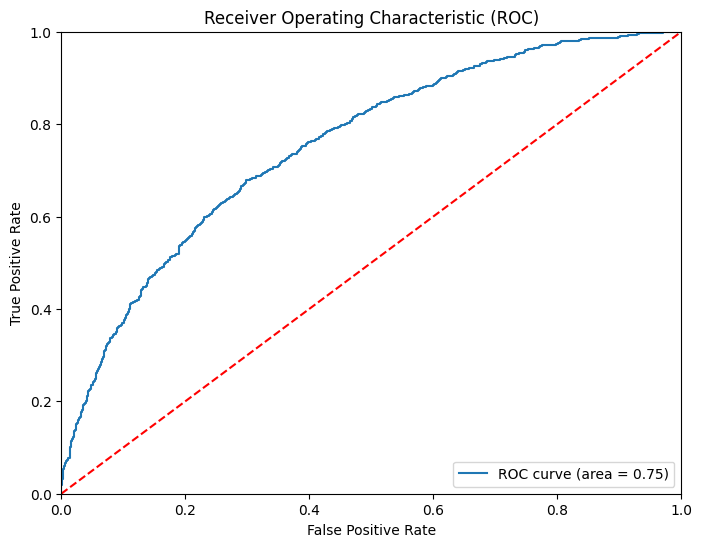

ROC AUC: 0.753409623681498


In [527]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_gbc_tuned.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

model gbc bisa dibilang ada peningkatan dibandingkan model XGB

### Model Catboost

Learning rate set to 0.033212
0:	learn: 0.6847283	total: 161ms	remaining: 2m 40s
1:	learn: 0.6766838	total: 171ms	remaining: 1m 25s
2:	learn: 0.6690488	total: 179ms	remaining: 59.6s
3:	learn: 0.6622423	total: 188ms	remaining: 46.9s
4:	learn: 0.6556132	total: 198ms	remaining: 39.3s
5:	learn: 0.6495440	total: 206ms	remaining: 34.2s
6:	learn: 0.6438408	total: 215ms	remaining: 30.4s
7:	learn: 0.6384865	total: 223ms	remaining: 27.6s
8:	learn: 0.6334777	total: 231ms	remaining: 25.4s
9:	learn: 0.6287716	total: 239ms	remaining: 23.7s
10:	learn: 0.6245527	total: 248ms	remaining: 22.3s
11:	learn: 0.6207806	total: 256ms	remaining: 21.1s
12:	learn: 0.6169709	total: 264ms	remaining: 20.1s
13:	learn: 0.6133039	total: 273ms	remaining: 19.2s
14:	learn: 0.6101198	total: 281ms	remaining: 18.4s
15:	learn: 0.6072115	total: 289ms	remaining: 17.8s
16:	learn: 0.6041822	total: 297ms	remaining: 17.2s
17:	learn: 0.6014929	total: 306ms	remaining: 16.7s
18:	learn: 0.5990053	total: 315ms	remaining: 16.3s
19:	learn

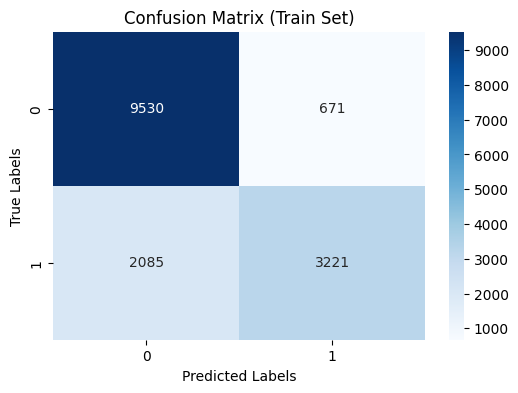

Text(45.722222222222214, 0.5, 'True Labels')

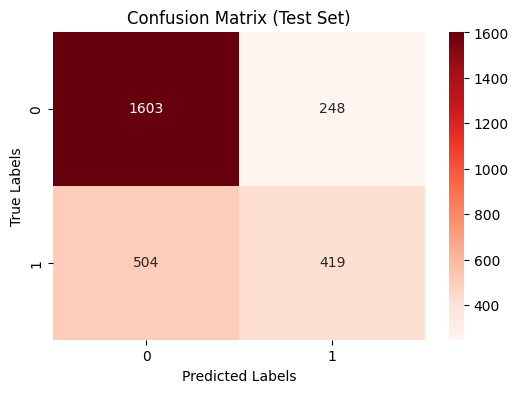

In [528]:
#import Model
model_catboost = CatBoostClassifier()
model_catboost.fit(X_train_fs, y_train)

#model random forest
y_pred_train_catboost = model_catboost.predict(X_train_fs)
y_pred_test_catboost = model_catboost.predict(X_test_fs)

#melihat score model random forest
print('classification Train Set catboost: \n', classification_report(y_train, y_pred_train_catboost))
#melihat score model random forest
print('classification test Set catboost: \n', classification_report(y_test, y_pred_test_catboost))

# Confusion matrix untuk train set svc
cm_train = confusion_matrix(y_train, y_pred_train_catboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set svc
cm_train = confusion_matrix(y_test, y_pred_test_catboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

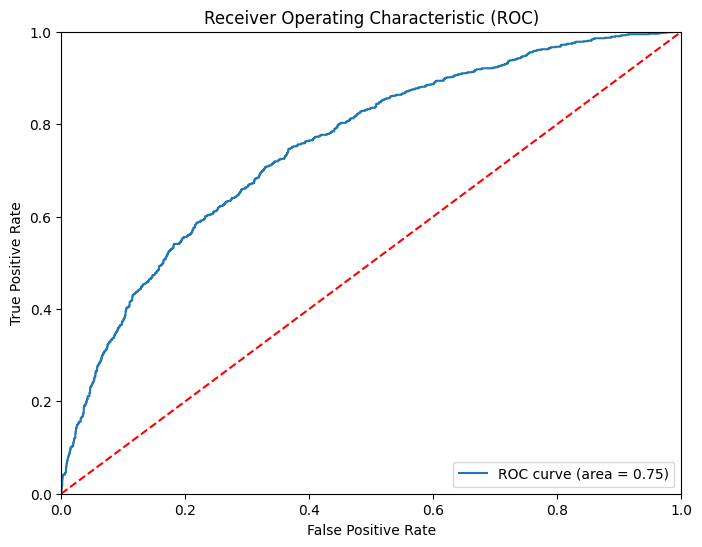

ROC AUC: 0.7534306951295104


In [529]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_catboost.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

In [550]:
param_grid_catboost = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
}

grid_search_catboost = GridSearchCV(estimator=model_catboost, param_grid=param_grid_catboost, cv=3,n_jobs=4)
grid_search_catboost.fit(X_train_fs, y_train)

print(grid_search_catboost.best_params_)
tuned_model_catboost = grid_search.best_estimator_
print(tuned_model_catboost)


0:	learn: 0.6905434	total: 12.5ms	remaining: 12.5s
1:	learn: 0.6880220	total: 24.8ms	remaining: 12.4s
2:	learn: 0.6854659	total: 37.1ms	remaining: 12.3s
3:	learn: 0.6830172	total: 48.5ms	remaining: 12.1s
4:	learn: 0.6805706	total: 61ms	remaining: 12.1s
5:	learn: 0.6781886	total: 73.7ms	remaining: 12.2s
6:	learn: 0.6758794	total: 86.9ms	remaining: 12.3s
7:	learn: 0.6736304	total: 104ms	remaining: 12.9s
8:	learn: 0.6713244	total: 126ms	remaining: 13.8s
9:	learn: 0.6692282	total: 149ms	remaining: 14.7s
10:	learn: 0.6671357	total: 169ms	remaining: 15.2s
11:	learn: 0.6650580	total: 187ms	remaining: 15.4s
12:	learn: 0.6629943	total: 202ms	remaining: 15.3s
13:	learn: 0.6609152	total: 216ms	remaining: 15.2s
14:	learn: 0.6588176	total: 231ms	remaining: 15.2s
15:	learn: 0.6568489	total: 244ms	remaining: 15s
16:	learn: 0.6548482	total: 258ms	remaining: 14.9s
17:	learn: 0.6529529	total: 273ms	remaining: 14.9s
18:	learn: 0.6512415	total: 286ms	remaining: 14.8s
19:	learn: 0.6493321	total: 299ms	rema

0:	learn: 0.6905434	total: 12.3ms	remaining: 12.3s
1:	learn: 0.6880220	total: 25.6ms	remaining: 12.8s
2:	learn: 0.6854659	total: 38.3ms	remaining: 12.7s
3:	learn: 0.6830172	total: 50.5ms	remaining: 12.6s
4:	learn: 0.6805706	total: 63.2ms	remaining: 12.6s
5:	learn: 0.6781886	total: 76.8ms	remaining: 12.7s
6:	learn: 0.6758794	total: 90.6ms	remaining: 12.9s
7:	learn: 0.6736304	total: 103ms	remaining: 12.8s
8:	learn: 0.6713244	total: 117ms	remaining: 12.8s
9:	learn: 0.6692282	total: 130ms	remaining: 12.9s
10:	learn: 0.6671357	total: 143ms	remaining: 12.8s
11:	learn: 0.6650580	total: 156ms	remaining: 12.8s
12:	learn: 0.6629943	total: 169ms	remaining: 12.8s
13:	learn: 0.6609152	total: 181ms	remaining: 12.8s
14:	learn: 0.6588176	total: 193ms	remaining: 12.7s
15:	learn: 0.6568489	total: 205ms	remaining: 12.6s
16:	learn: 0.6548482	total: 218ms	remaining: 12.6s
17:	learn: 0.6529529	total: 232ms	remaining: 12.7s
18:	learn: 0.6512415	total: 244ms	remaining: 12.6s
19:	learn: 0.6493321	total: 258ms	

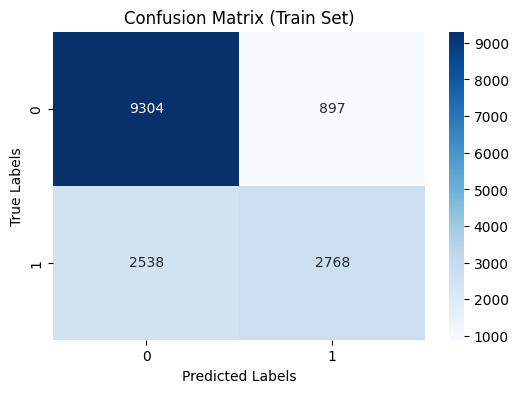

Text(45.722222222222214, 0.5, 'True Labels')

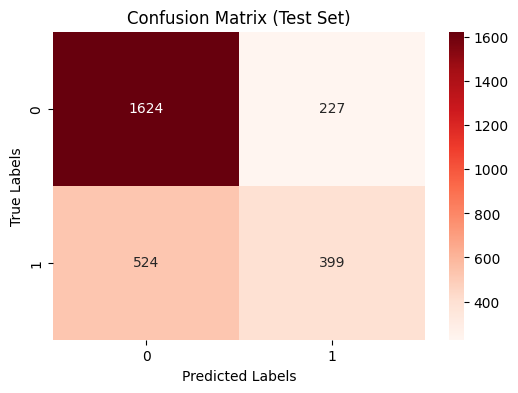

In [551]:
#import model
model_catboost_tuned = CatBoostClassifier(border_count= 64, depth= 7, l2_leaf_reg= 1, learning_rate= 0.01)
model_catboost_tuned.fit(X_train_fs, y_train)

#model
y_pred_train_catboost_tuned = model_catboost_tuned.predict(X_train_fs)
y_pred_test_catboost_tuned = model_catboost_tuned.predict(X_test_fs)

#melihat score model 
print('classification Train Set catboost: \n', classification_report(y_train, y_pred_train_catboost_tuned))
#melihat score model 
print('classification test Set catboost: \n', classification_report(y_test, y_pred_test_catboost_tuned))

# Confusion matrix untuk train 
cm_train = confusion_matrix(y_train, y_pred_train_catboost_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test 
cm_train = confusion_matrix(y_test, y_pred_test_catboost_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

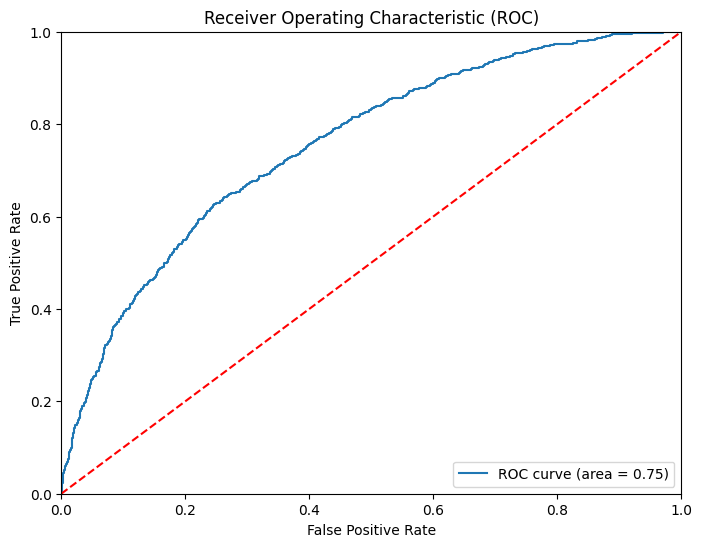

ROC AUC: 0.7541506362699323


In [552]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_catboost_tuned.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

### Model LGB

classification Train Set lgb: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     10201
           1       0.79      0.58      0.67      5306

    accuracy                           0.80     15507
   macro avg       0.80      0.75      0.76     15507
weighted avg       0.80      0.80      0.79     15507

classification test Set lgb: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      1851
           1       0.62      0.46      0.53       923

    accuracy                           0.73      2774
   macro avg       0.69      0.66      0.67      2774
weighted avg       0.71      0.73      0.71      2774



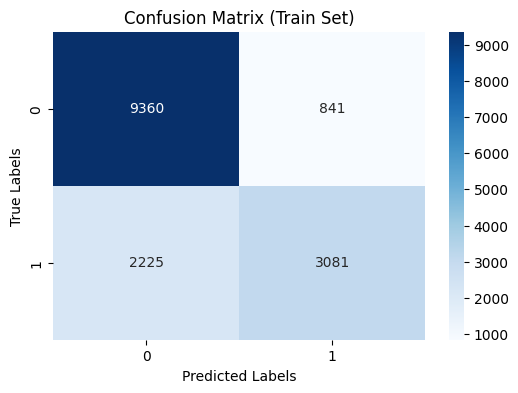

Text(45.722222222222214, 0.5, 'True Labels')

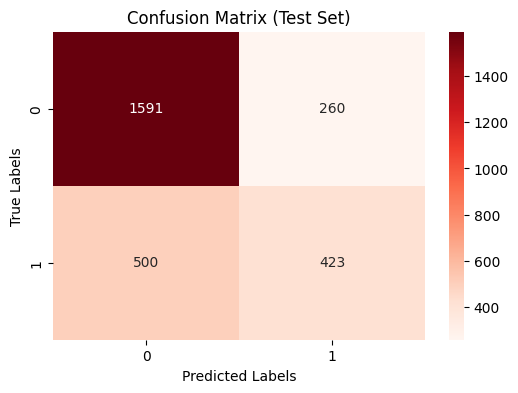

In [530]:
#import Model
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train_fs, y_train)

#model random forest
y_pred_train_lgb = model_lgb.predict(X_train_fs)
y_pred_test_lgb = model_lgb.predict(X_test_fs)

#melihat score model random forest
print('classification Train Set lgb: \n', classification_report(y_train, y_pred_train_lgb))
#melihat score model random forest
print('classification test Set lgb: \n', classification_report(y_test, y_pred_test_lgb))

# Confusion matrix untuk train set svc
cm_train = confusion_matrix(y_train, y_pred_train_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set svc
cm_train = confusion_matrix(y_test, y_pred_test_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

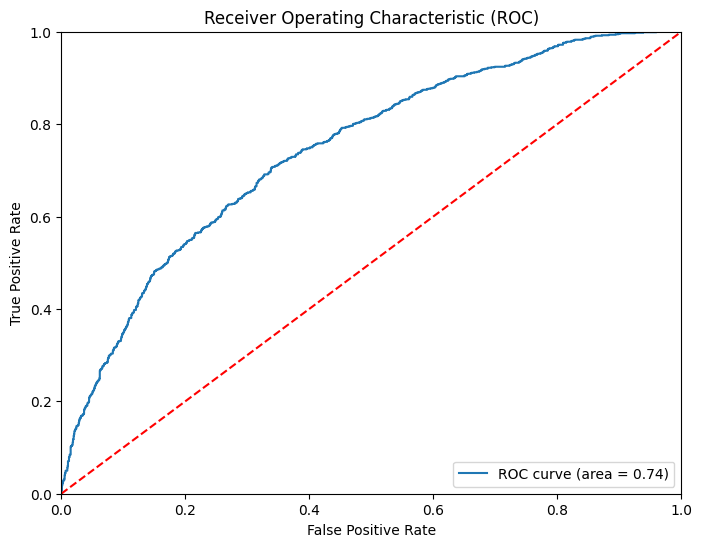

ROC AUC: 0.7436915889218033


In [533]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_lgb.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

In [553]:
param_grid_lgb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'num_leaves': [31, 63, 127]
}

grid_search_lgb = GridSearchCV(estimator=model_lgb, param_grid=param_grid_lgb, cv=3,n_jobs=4)
grid_search_lgb.fit(X_train_fs, y_train)

print(grid_search_lgb.best_params_)
tuned_model_lgb = grid_search.best_estimator_
print(tuned_model_lgb)


{'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


classification Train Set lgb_tuned: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84     10201
           1       0.73      0.52      0.61      5306

    accuracy                           0.77     15507
   macro avg       0.76      0.71      0.72     15507
weighted avg       0.77      0.77      0.76     15507

classification test Set lgb_tuned: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1851
           1       0.62      0.44      0.51       923

    accuracy                           0.72      2774
   macro avg       0.69      0.65      0.66      2774
weighted avg       0.71      0.72      0.71      2774



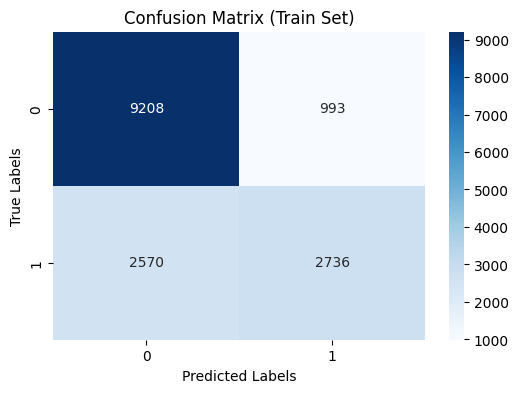

Text(45.722222222222214, 0.5, 'True Labels')

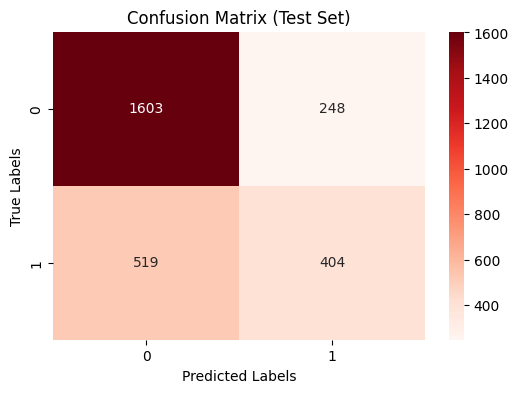

In [555]:
#import Model
model_lgb_tuned = lgb.LGBMClassifier(learning_rate= 0.01, n_estimators= 500, num_leaves= 31)
model_lgb_tuned.fit(X_train_fs, y_train)

#model random forest
y_pred_train_lgb_tuned = model_lgb_tuned.predict(X_train_fs)
y_pred_test_lgb_tuned = model_lgb_tuned.predict(X_test_fs)

#melihat score model random forest
print('classification Train Set lgb_tuned: \n', classification_report(y_train, y_pred_train_lgb_tuned))
#melihat score model random forest
print('classification test Set lgb_tuned: \n', classification_report(y_test, y_pred_test_lgb_tuned))

# Confusion matrix untuk train set svc
cm_train = confusion_matrix(y_train, y_pred_train_lgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set svc
cm_train = confusion_matrix(y_test, y_pred_test_lgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

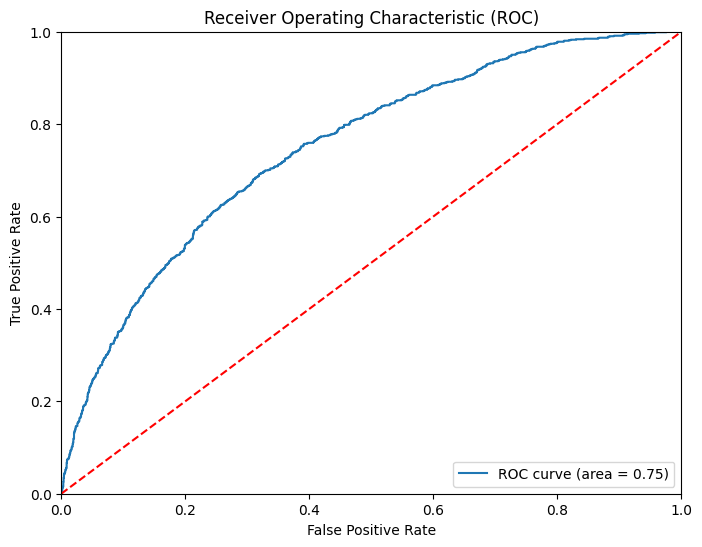

ROC AUC: 0.7492913262310846


In [556]:
# Ambil skor probabilitas prediksi dari model untuk kelas positif (1)
y_pred_proba = model_lgb_tuned.predict_proba(X_test_fs)[:, 1]

# Hitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Garis referensi untuk ROC acak
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC:", roc_auc)

## 7. Kesimpulan
    Menurut saya model-model dalam project yang saya lakukan kali ini masih bersifat sedikit underfitting atau overfitting. Ini dimungkinkan terjadi karena pilihan saya untuk melakukan pemodelan tanpa melakukan imputasi terhadap nilai null yang membuat data train menjadi berkurang banyak(lebih dari 70%) dan membuat saya tidak bisa menggunakan fitur fitur yang memiliki nilai null yang besar sehingga model menjadi kurang belajar. dan menurut saya model terbaik dalam model ini adalah model GBC meskipun saya tidak melakukan hyperparameter tuning dengan gridsearch(karena proses trainingya sangat lama sehingga saya menghentikanya) tetapi tidak memiliki sifat overfitting dan memiliki score weighted average f1 score, ROC AUC, dan accuracy yang tidak berbeda jauh dengan model lainya. Akan tetapi karena GBC tidak bisa dimasukan nilai nan maka pilihan model hanyalah lightGBM, CatBoost, atau XGBoosting

Kelebihan Model: 
1. Model ini memiliki kelebihan bahwa ketika model sudah dideploy, model tidak akan memiliki perbedaan peforma yang besar dengan saat pemodelan karena dalam pemodelan ini tidak ada proses pengubahan data atau inputasi data.

Kekurangan Model :
1. Model ini masih memiliki peforma yang hanya bisa dikatakan cukup baik. ini disebabkan karena model masih belum cukup belajar karena terlalu banyak data yang di drop

Future Improvement :
1. Meminimalisir dropping data, dengan cara dropping datanya ketika sudah ada feature selection yang final
2. Melakukan pemodeling dengan tensorflow jika sudah mendapatkan data yang sudah bersih dan berjumlah ada lumayan banyak
3. Melakukan feature selection. saya tidak melakukan feature selection pada model ini karena saat saya melakukan modelling untuk keperluan baseline saja dan mencari shap value, saya menemukan bahwa score baseline tanpa menggunakan feature selection sudah cukup bagus. sehingga saya mencoba modelling dengan model lain dan mentuningnya sehingga saya kehabisan waktu
4. Mengambil feature yang didapat dari tabel lain, seperti kolom status di tabel bureau_balance
    

## 8. Saving model

In [559]:
with open('model_gbc.pkl', 'wb') as file_1:
  pickle.dump(model_gbc, file_1)

with open('model_numeric_transformer.pkl', 'wb') as file_2:
  pickle.dump(numeric_transformer, file_2)

with open('model_categoric_transformer.pkl', 'wb') as file_3:
  pickle.dump(categoric_transformer, file_3)

with open('list_num_columns_fs.txt', 'w') as file_4:
  json.dump(num_columns_fs, file_4)

with open('list_cat_columns_fs.txt', 'w') as file_5:
  json.dump(cat_columns_fs, file_5)

with open('model_xgb_tuned.pkl', 'wb') as file_6:
  pickle.dump(model_xgb_tuned, file_6)
